## About the dataset

AMES Housing Dataset by Dean De Cock (Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Housing Prices visualizations

In [2]:
%pip install pandas matplotlib seaborn numpy scikit-learn scipy

  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.1.2-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.1 kB)
  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

try:
    from google.colab import drive #give colab access to google drive...
    from google.colab import auth

    auth.authenticate_user()

    drive.mount('/content/drive')
    thePath = '/content/drive/My Drive/DSE200_Data/'
except:
    thePath = './'

### Data Exploration
- Visualize
- Find Missing Data
- Look For Correlations

In [4]:
df = pd.read_csv(thePath + 'train.csv') # loading the ames data

#### Analysing Sale Price

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

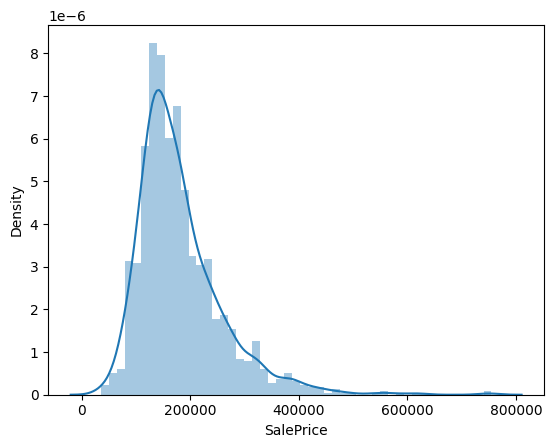

In [6]:
sns.distplot(df['SalePrice']);

We observe that the data
- Deviates from the normal distribution.
- Has appreciable positive skewness.
- Shows peakedness.

In [7]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Examples of Relations with Numerical Variables

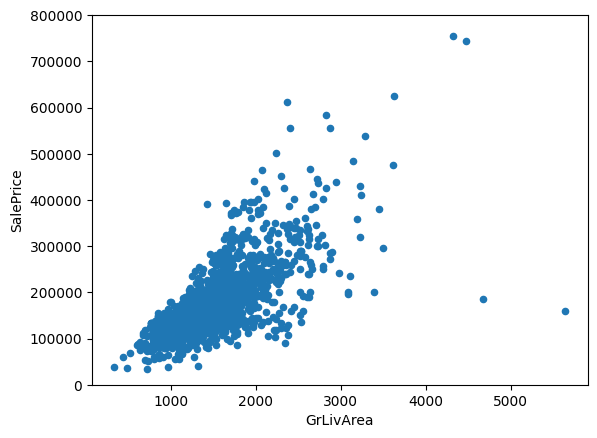

In [8]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We notice a linear relationship

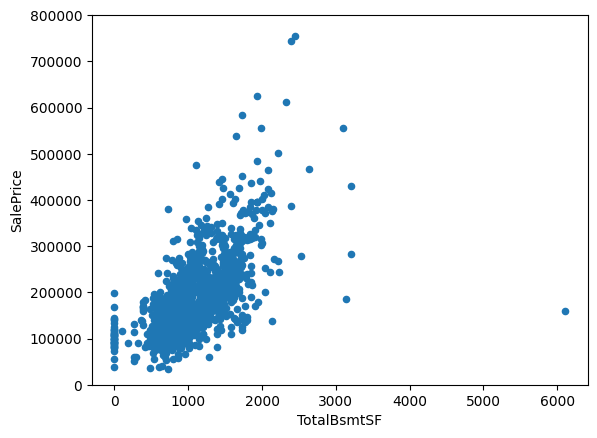

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

linear relation with a higher slope

### Examples of Relations with Categorical Variables

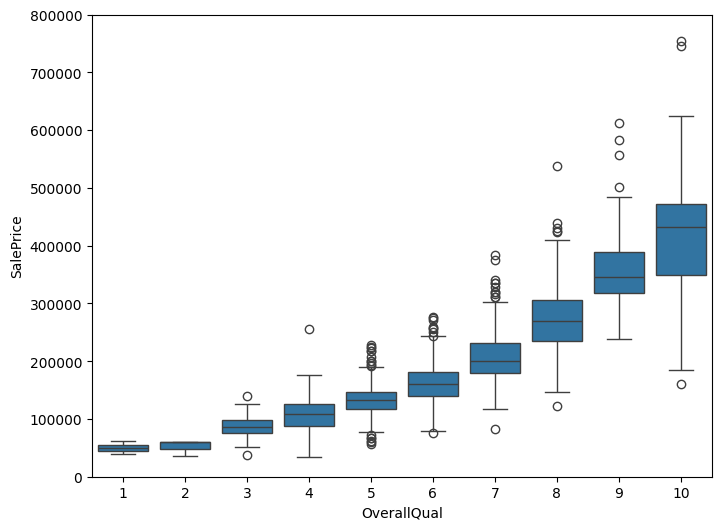

In [10]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


we see a positive correlation between these two variables

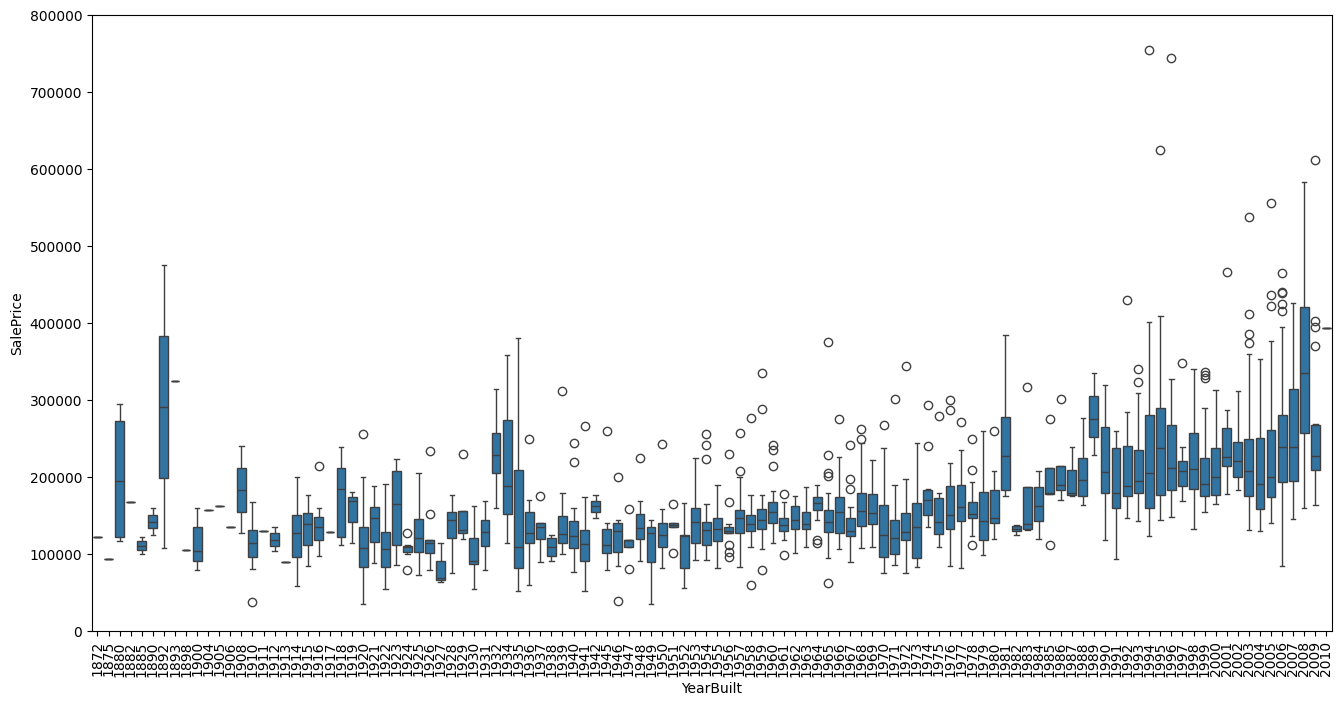

In [11]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Although not a strong one, we still see a positive correlation between these two variables as well

### Correlation Matrix

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


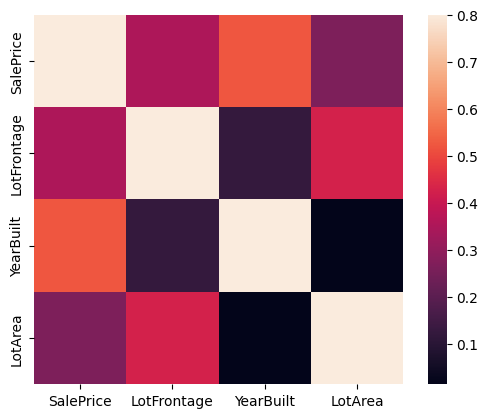

In [13]:

var = 'LotArea' # 'YearBuilt' 
data = pd.concat([df['SalePrice'], df[var]], axis=1)
#corrmat = df.corr()
data = pd.concat([df['SalePrice'], df['LotFrontage'],df['YearBuilt'],df['LotArea']], axis=1)
corrmat = data.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

From this overview of all the realtions

### We pick "k" columns which are most correlated with Sale Price

In [14]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'YearBuilt', 'LotFrontage', 'LotArea'], dtype='object')

In [15]:
cmvals = df[cols].values.T
cmvals

array([[2.08500e+05, 1.81500e+05, 2.23500e+05, ..., 2.66500e+05,
        1.42125e+05, 1.47500e+05],
       [2.00300e+03, 1.97600e+03, 2.00100e+03, ..., 1.94100e+03,
        1.95000e+03, 1.96500e+03],
       [6.50000e+01, 8.00000e+01, 6.80000e+01, ..., 6.60000e+01,
        6.80000e+01, 7.50000e+01],
       [8.45000e+03, 9.60000e+03, 1.12500e+04, ..., 9.04200e+03,
        9.71700e+03, 9.93700e+03]])

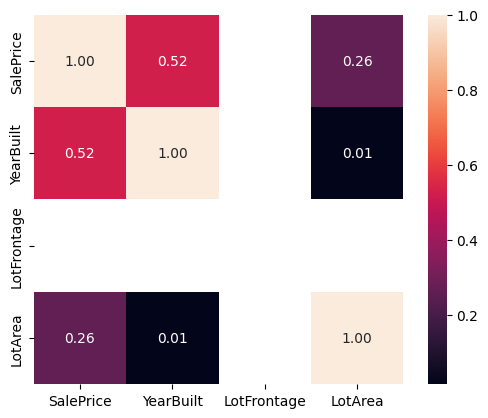

In [16]:
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'<br/>
'GarageCars' can be assumed to be dependent on 'GarageArea'. Hence we choose only 'GarageCars' since its correlation with 'SalePrice' is higher <br/>
'TotalBsmtSF' and '1stFloor' represent kinda the same thing so we pick one ('TotalBsmtSF')<br/>
'TotRmsAbvGrd' and 'GrLivArea' have a high correlation as expected.<br/>
TODO :  Time series analysis for 'YearBuilt'


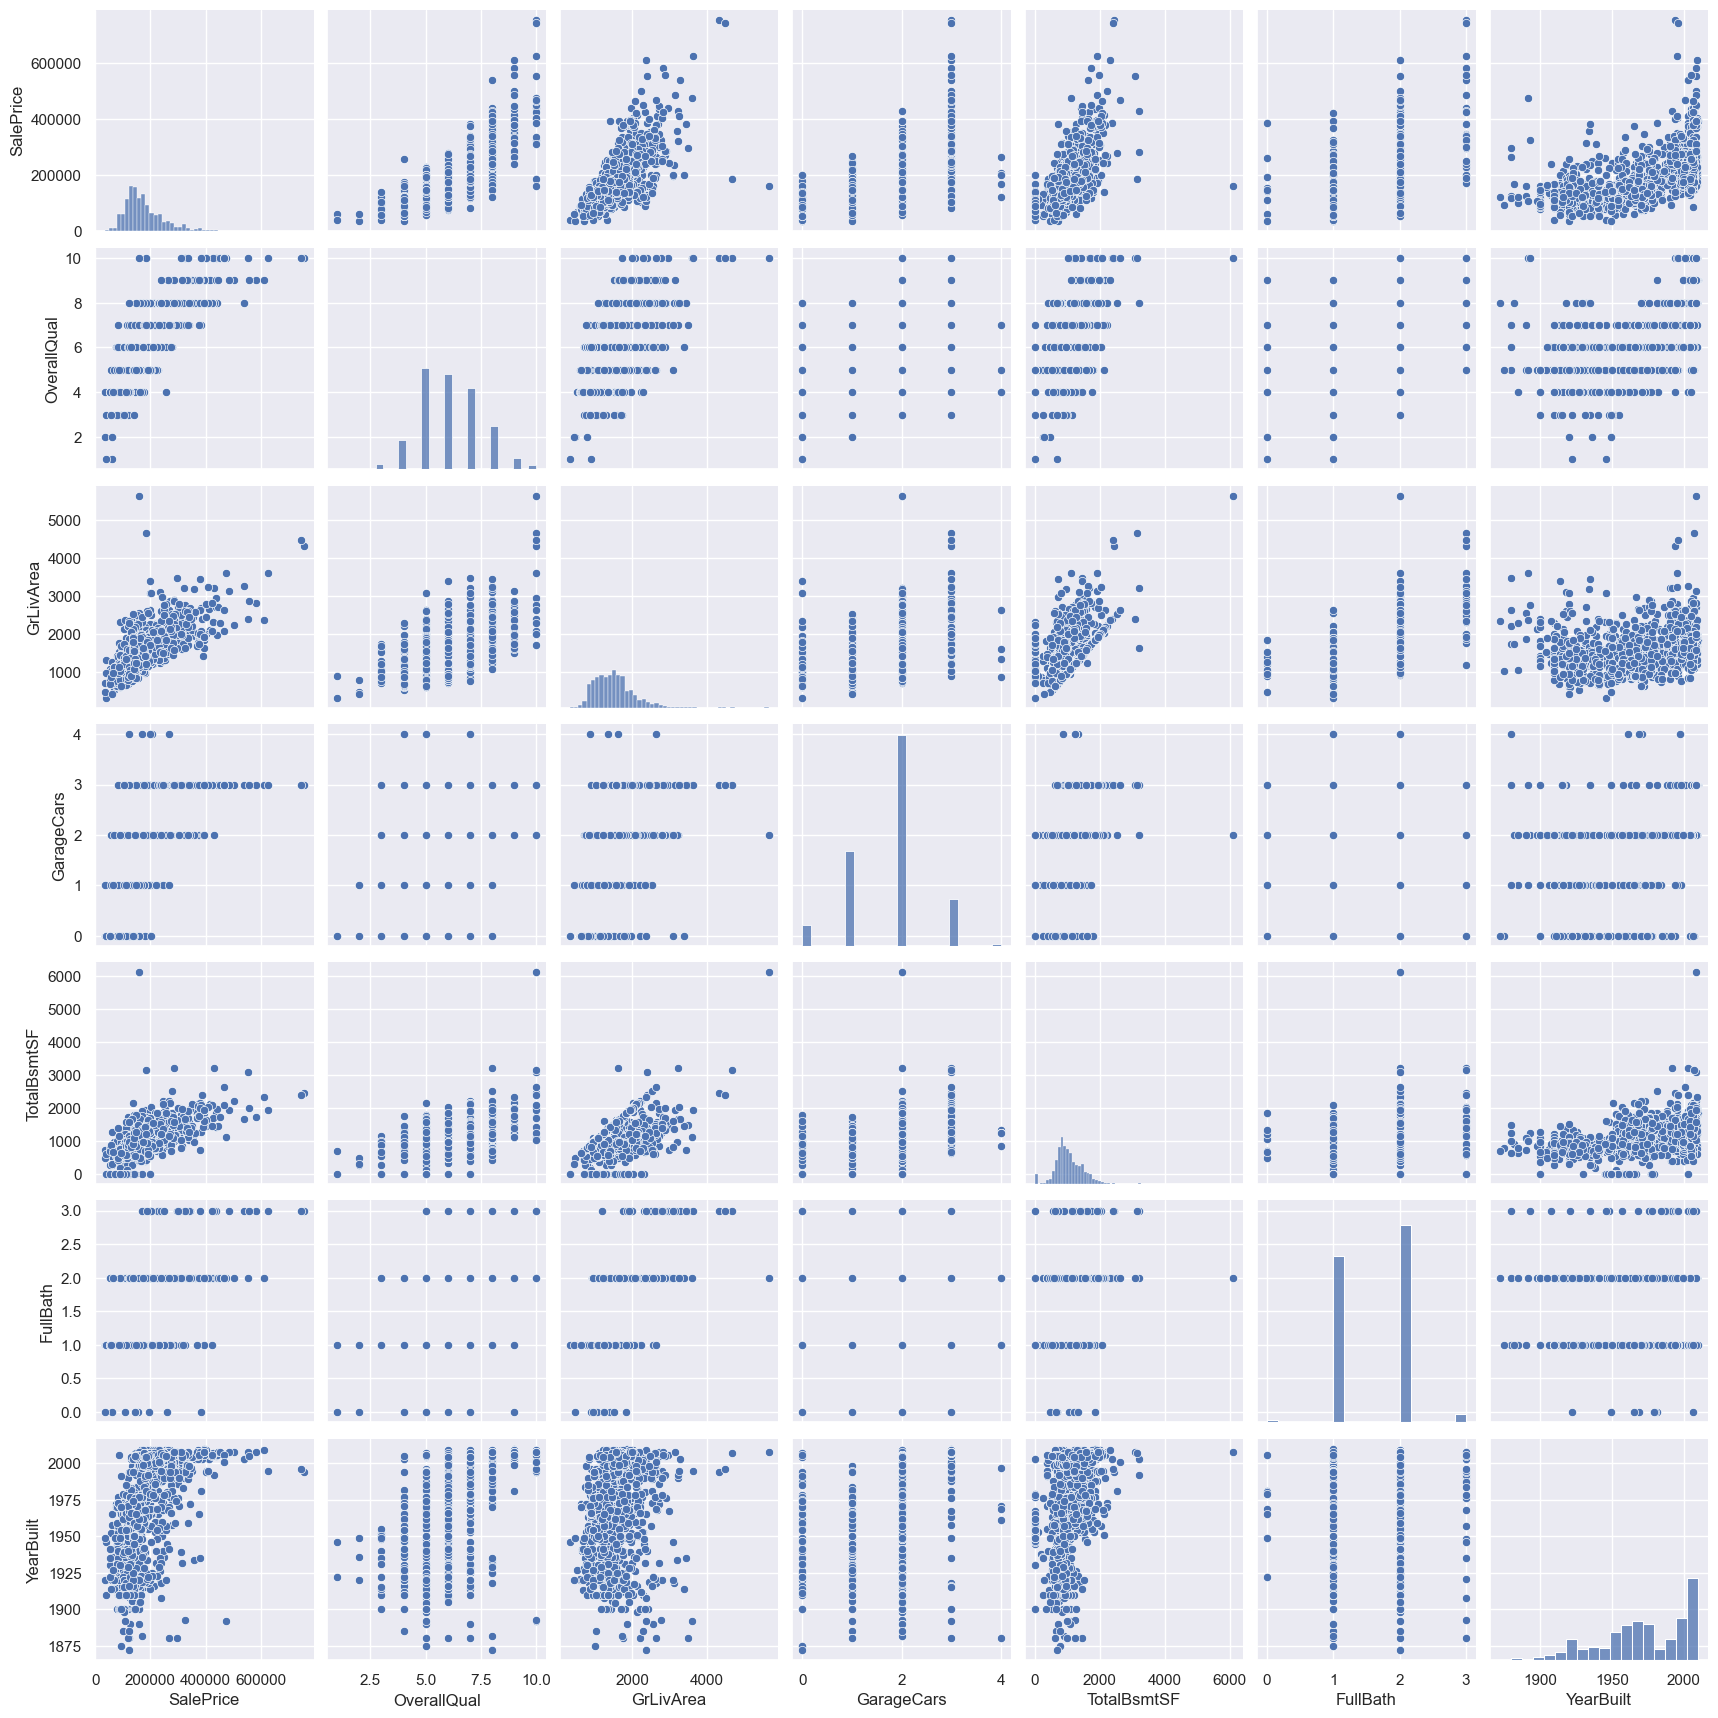

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Data Cleaning

#### Missing Data

In [18]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


columns with more than 80% of the data is missing are chosen to be deleted. Hence the set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc. are chosen for deletion. Further, these features show nearly 0 correlation with 'Sale Price'

'GarageCars' will represent most info regarding garages, hence other 'GarageX' variables can be ignored.

For 'Electrical', we can either use another value to fill the missing value or drop the observation. In this case we drop the observation

In [19]:
(missing_data[missing_data['Total'] > 1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

In [ ]:
#df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df = df.drop(df.loc[df['Electrical'].isnull()].index)

#### Outliers

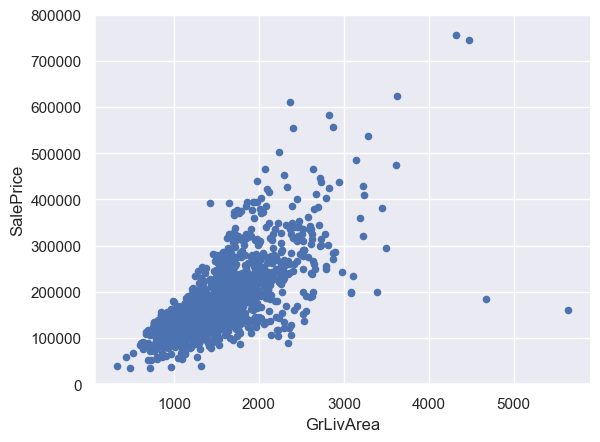

In [20]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The rightmost observations in 'GrLivArea' seem to be outliers <br/>
The topmost observations in 'SalePrice' seem to follow the trend hence we do not consider them as outliers

In [21]:
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

#### Normality

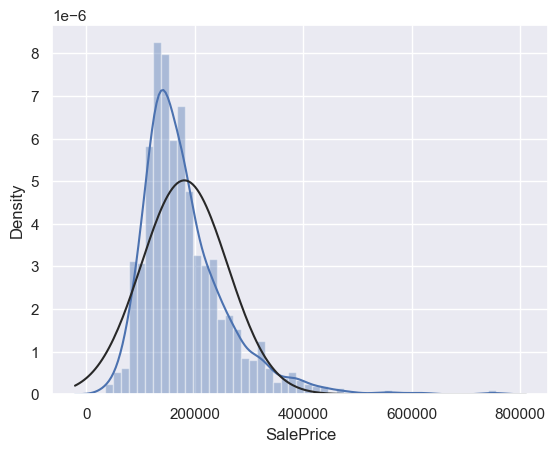

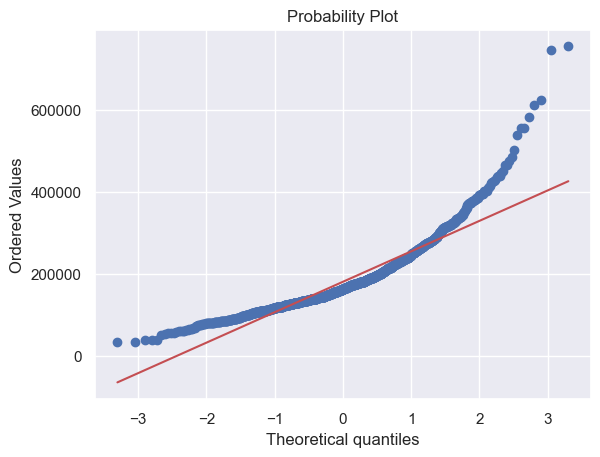

In [22]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

<b>Normal Probability Plot : </b>The data are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. Departures from this straight line indicate departures from normality.

in case of positive skewness, log transformations usually works well

In [23]:
df['SalePrice'] = np.log(df['SalePrice'])

Replotting

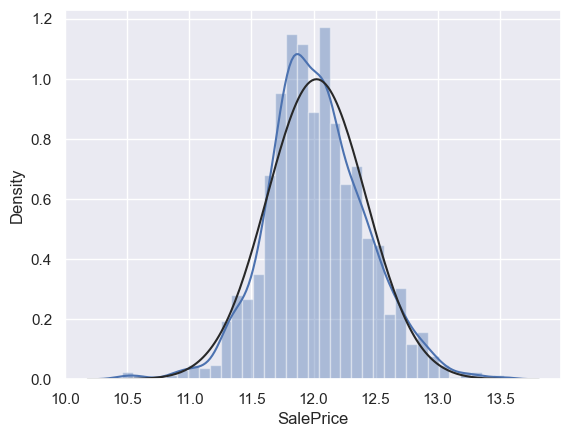

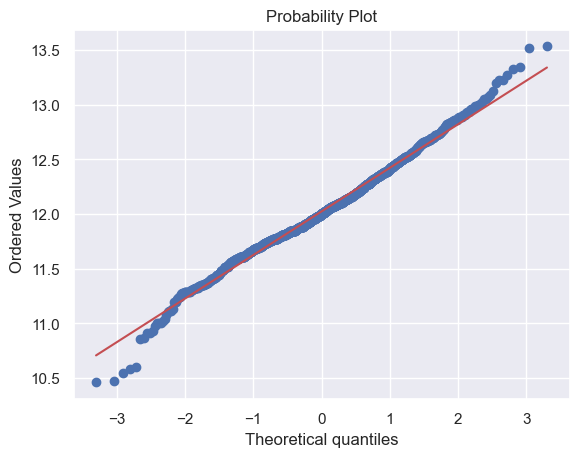

In [24]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

Checking the col : GrLivArea

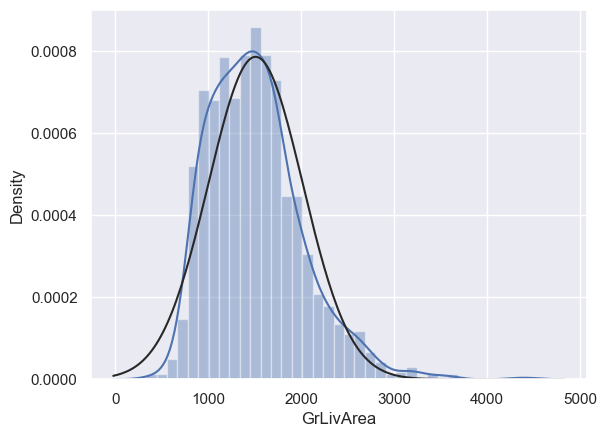

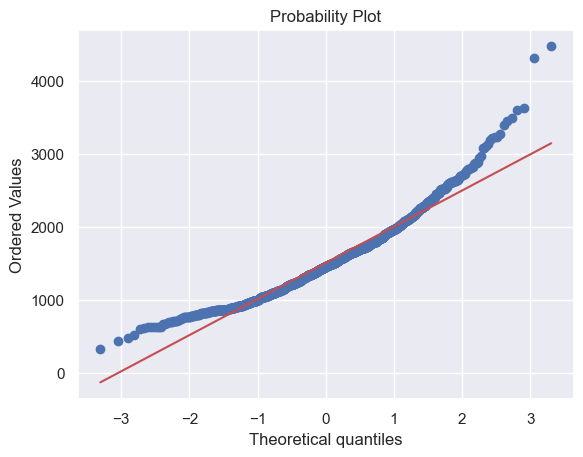

In [25]:
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

Applying similar transformation

In [26]:
df['GrLivArea'] = np.log(df['GrLivArea'])

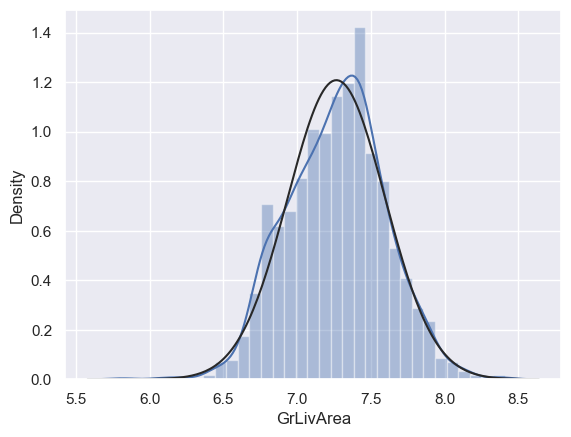

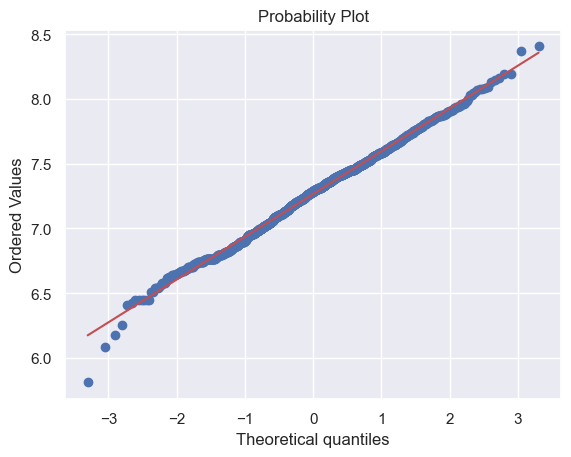

In [27]:
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

Checking for col : TotalBsmtSF

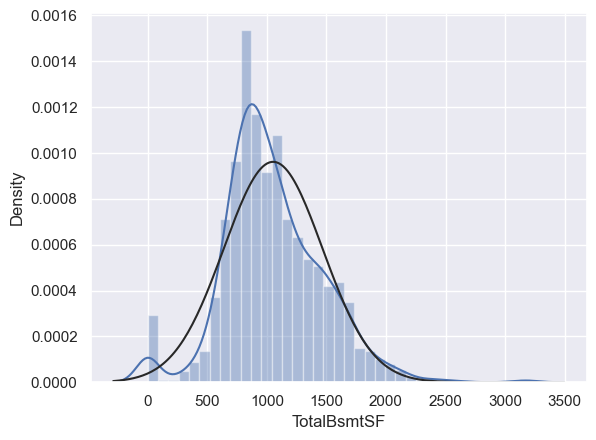

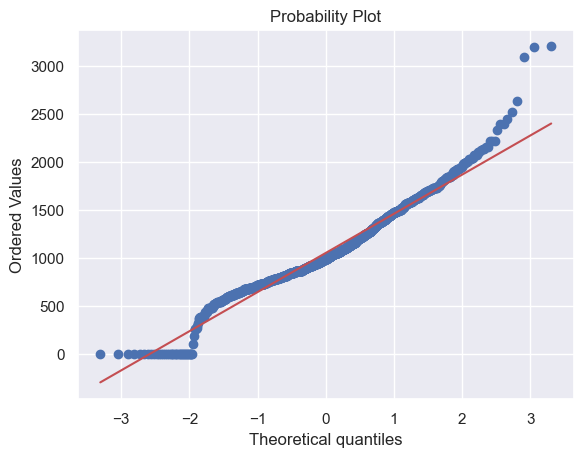

In [28]:
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

Here we see postive skewness but quite a few of the points are 0

In [29]:
df.loc[df['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

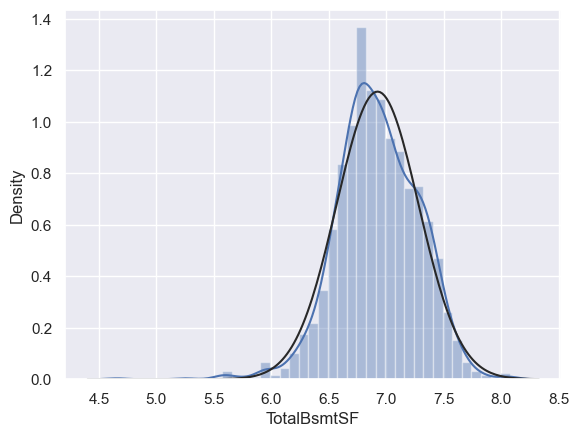

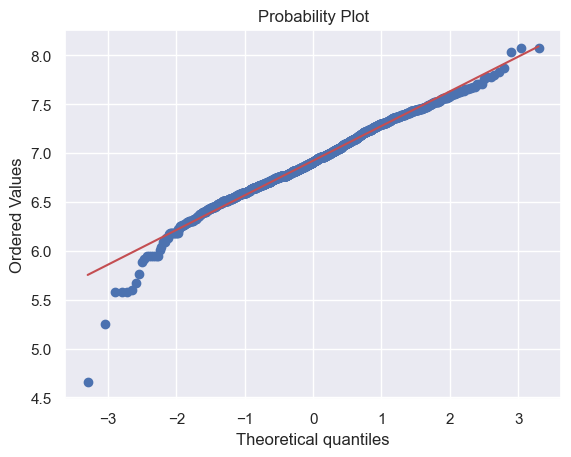

In [30]:
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [31]:
s = pd.Series(list('abca'))

In [ ]:
s

#### Credits

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python <br/>
https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python/notebook